## Model Training

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')



In [3]:
df=pd.read_csv('data\stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math_score'],axis=1)

In [6]:
y=df['math_score']

In [7]:
# Create column Transformer with 3 types of transformation 

num_features= X.select_dtypes(exclude="object").columns
cat_features= X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor=ColumnTransformer(

    [

        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [8]:
X=preprocessor.fit_transform(X)

In [9]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [10]:
# Seperate dataset into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.shape,X_test.shape

((670, 19), (330, 19))

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models={
    "Liner Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regrssor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(),
    "AdaBoosting Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)        # train the model

    # make predictions

    y_predict=model.predict(X_test)

    # Evaluate Train and Test Dataset 
    model_train_mae, model_train_rmse,model_train_r2=evaluate_model(y_test,y_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_train_r2)

    print("Model Performance ")
    print("- Root Mean Square Error:{:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("- R2 Score:{:.4f}".format(model_train_r2))
    print('='*35)
    print('\n')

Liner Regression
Model Performance 
- Root Mean Square Error:5.4846
- Mean Absolute Error:4.3616
- R2 Score:0.8761


Lasso
Model Performance 
- Root Mean Square Error:6.8057
- Mean Absolute Error:5.3547
- R2 Score:0.8092


Ridge
Model Performance 
- Root Mean Square Error:5.4951
- Mean Absolute Error:4.3670
- R2 Score:0.8756


K-Neighbors Regressor
Model Performance 
- Root Mean Square Error:7.3447
- Mean Absolute Error:5.6848
- R2 Score:0.7778


Decision Tree
Model Performance 
- Root Mean Square Error:8.3661
- Mean Absolute Error:6.6879
- R2 Score:0.7117


Random Forest Regrssor
Model Performance 
- Root Mean Square Error:6.0393
- Mean Absolute Error:4.7657
- R2 Score:0.8497


XGBRegressor
Model Performance 
- Root Mean Square Error:6.5016
- Mean Absolute Error:5.2259
- R2 Score:0.8259


Learning rate set to 0.038433
0:	learn: 14.5436949	total: 141ms	remaining: 2m 20s
1:	learn: 14.2401466	total: 143ms	remaining: 1m 11s
2:	learn: 13.9123263	total: 144ms	remaining: 47.8s
3:	learn: 13.5

#### Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['model', 'r2_score']).sort_values(by='r2_score', ascending=False)

,model,r2_score
0,Liner Regression,0.876079
2,Ridge,0.875602
7,CatBoosting Regressor,0.858163
5,Random Forest Regrssor,0.849745
8,AdaBoosting Regressor,0.836272
6,XGBRegressor,0.825863
1,Lasso,0.809187
3,K-Neighbors Regressor,0.777768
4,Decision Tree,0.711665


#### Linear Regression

In [15]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)

score=r2_score(y_test,y_pred)*100
print("The Accuracy of the model is %0.2f"%score)

The Accuracy of the model is 87.61


### Plot y_pred vs y_test

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Prediction')

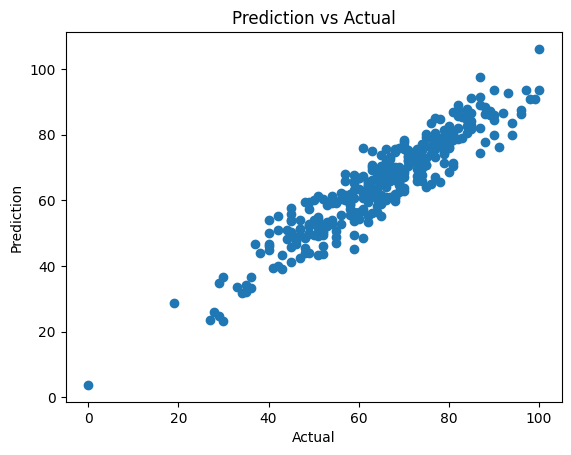

In [19]:
plt.scatter(y_test,y_pred)
plt.title("Prediction vs Actual")
plt.xlabel('Actual')
plt.ylabel('Prediction')

<Axes: xlabel='math_score'>

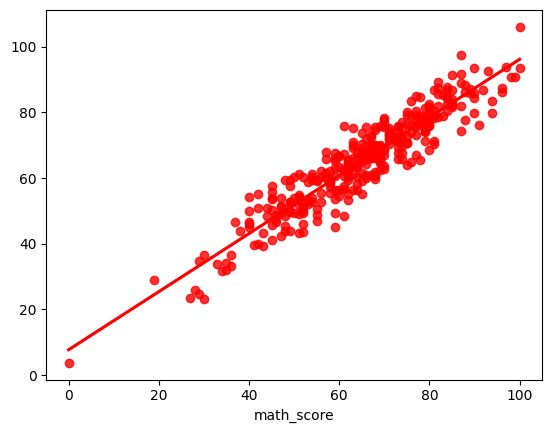

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

## Difference between Actual and Predicted Values 

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predictive value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predictive value,Difference
521,91,76.265625,14.734375
737,53,58.687500,-5.687500
740,80,76.984375,3.015625
660,74,76.984375,-2.984375
411,84,87.656250,-3.656250
...,...,...,...
506,68,74.734375,-6.734375
342,69,65.312500,3.687500
485,70,78.359375,-8.359375
711,80,79.812500,0.187500
